In [19]:
# dissertation 

#basic python packages for pandas dataframes and numpy for calculations 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for sentiment analysis, and natural language processing 
import textblob 
import nltk
import string 
import wordcloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# for social network analysis 
import networkx as nx 
import itertools
from itertools import combinations as comb



In [3]:
#loading the csv files 
df1 = pd.read_csv("coded_csa_tweets.csv")

df2 = pd.read_csv("CSA_tweets_sample_500[1270].csv")
#reading csv files - df stands for dataframe 

df2['description'] = df2.description.astype(str)


In [4]:
#forming new dataframes 
df = pd.DataFrame(df1[['screen_name', 'mentions_screen_name', 'text', 'created_at', 'screen_name_bio']])

data = pd.DataFrame(df2[['user_id', 'status_id', 'screen_name', 'text', 'hashtags', 'symbols', 'retweet_status_id', 'retweet_text',
      'place_name', 'place_full_name', 'country', 'country_code', 'geo_coords', 'coords_coords','bbox_coords', 'name', 'location', 'description', 'followers_count', 'friends_count','verified','date', 'current_time', 'reply_count']])




In [5]:
#data cleaning and processing 

#ensuring its a string
df['text_ed'] = df['text'].astype(str)

df['text_ed'][3]

"There's something particularly satisfying about planting onion sets. We've thousands to get in #volunteer #workday https://t.co/jIC4CVBEqH"

In [6]:
#remove Urls 
import re
df['text_ed'] = df['text_ed'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

df['text_ed'][3]     

"There's something particularly satisfying about planting onion sets. We've thousands to get in #volunteer #workday "

In [7]:
#removes @usernames from tweets text

def username(x)
Tweet = re.sub('@[^\s]+','',Tweet)


df['text_ed'] = df['text_ed'].apply(lambda x: re.split('@[^\s]*', str(x))[0])

df['text_ed'][4]

'We want to pursue small on a large scale, supporting cooperatives, social enterprises &amp; community businesses that that are at an early stage of development but have already built up their local community of support #realfarming #realfood'

In [8]:
#corrects spelling
#df.text_ed.apply(lambda txt: ''.join(textblob.TextBlob(txt).correct()))

#df['text_ed'][3]


In [9]:
#lowercase
df['text_ed'] = df['text_ed'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text_ed'][3]


"there's something particularly satisfying about planting onion sets. we've thousands to get in #volunteer #workday"

In [10]:
punc = string.punctuation 
print(punc)

df['text_ed'] = df['text_ed'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))

df['text_ed'][3]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


"there's something particularly satisfying about planting onion sets. we've thousands to get in #volunteer #workday"

In [11]:
#remove stopwords such as he/she/it
stop = stopwords.words('english')

print(stop)

df['text_ed'] = df['text_ed'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['text_ed'][3]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

"there's something particularly satisfying planting onion sets. we've thousands get #volunteer #workday"

In [12]:
#sentiment analysis on text_ed (cleaned)

def senti(x):
    return TextBlob(x).sentiment.polarity

df['polarity'] = df['text_ed'].apply(senti)

df


,screen_name,mentions_screen_name,text,created_at,screen_name_bio,text_ed,polarity
0,user_1,user_6,A wonderful guest blog post on the A Team's bl...,2019-03-25T11:20:20Z,Building the #community supported #agriculture...,wonderful guest blog post team's blog,1.000000
1,user_1,user_7,A wonderful guest blog post on the A Team's bl...,2019-03-25T11:20:20Z,Building the #community supported #agriculture...,wonderful guest blog post team's blog,1.000000
2,user_1,user_1,A wonderful guest blog post on the A Team's bl...,2019-03-25T11:20:20Z,Building the #community supported #agriculture...,wonderful guest blog post team's blog,1.000000
3,user_1,user_3,There's something particularly satisfying abou...,2019-03-25T07:46:59Z,Building the #community supported #agriculture...,there's something particularly satisfying plan...,0.500000
4,user_1,user_8,"We want to pursue small on a large scale, supp...",2019-03-23T06:35:25Z,Building the #community supported #agriculture...,"want pursue small large scale, supporting coop...",0.057937
...,...,...,...,...,...,...,...
26245,user_194,user_10412,It's Volunteers Week. #ThirdSectorTrends has n...,2020-06-04T15:42:41Z,The independent trust that supports community ...,volunteers week. #thirdsectortrends new data v...,0.136364
26246,user_194,user_10413,Another @peoplesbiz supported @ssemidlands Fel...,2020-06-04T15:42:36Z,The independent trust that supports community ...,another,0.000000
26247,user_194,user_194,Another @peoplesbiz supported @ssemidlands Fel...,2020-06-04T15:42:36Z,The independent trust that supports community ...,another,0.000000
26248,user_194,user_10413,@ssemidlands Fellows from our @peoplesbiz prog...,2020-06-04T15:42:32Z,The independent trust that supports community ...,,0.000000


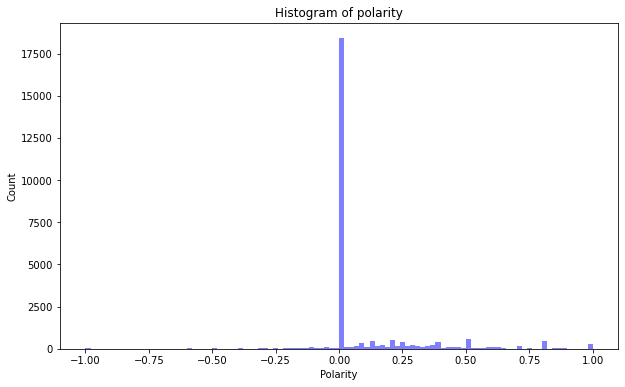

In [13]:

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, 100, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [14]:
data['screen_name'].loc[data['verified']== True].value_counts()
data['screen_name'].value_counts().head(40)

farmer = data[data['description'].str.contains('farm')]
farmer.screen_name.value_counts()

charity = data[data['description'].str.contains('charity')]
charity.screen_name.value_counts()

df['screen_name_bio'] = df['screen_name_bio'].astype(str)
farms = df[df['screen_name_bio'].str.contains('farm')]
charities = df[df['screen_name_bio'].str.contains('charity')]

In [29]:
organic = df[df['text'].str.contains('organic')]

institution_mention = df[df['text'].str.contains('Soil Association','DEFRA')]

organicfarms = organic[organic['screen_name_bio'].str.contains('farm')]

institution_mention

,screen_name,mentions_screen_name,text,created_at,screen_name_bio,text_ed,polarity
3457,user_46,user_2277,@NaomiLWood @LowthPeter @SoilAssociation @agri...,2019-05-17T18:26:27Z,"On environment, justice, food, farming. Strate...",,0.00
3458,user_46,user_2278,@NaomiLWood @LowthPeter @SoilAssociation @agri...,2019-05-17T18:26:27Z,"On environment, justice, food, farming. Strate...",,0.00
3459,user_46,user_19,@NaomiLWood @LowthPeter @SoilAssociation @agri...,2019-05-17T18:26:27Z,"On environment, justice, food, farming. Strate...",,0.00
3460,user_46,user_2041,@NaomiLWood @LowthPeter @SoilAssociation @agri...,2019-05-17T18:26:27Z,"On environment, justice, food, farming. Strate...",,0.00
9691,user_19,user_4860,⚡️ You have the power to make change\n\n🎄💚 @Go...,2019-12-20T15:05:05Z,We are the UK's leading organic food and farmi...,⚡️ power make change 🎄💚,0.00
10110,user_19,user_3891,@HamptonGayFarm @1kilroywashere When we're ref...,2020-01-07T12:09:49Z,We are the UK's leading organic food and farmi...,,0.00
10111,user_19,user_5017,@HamptonGayFarm @1kilroywashere When we're ref...,2020-01-07T12:09:49Z,We are the UK's leading organic food and farmi...,,0.00
23239,user_19,user_4841,@fuxachechunk @SoilAssocScot Our Soil Associat...,2020-05-15T12:59:48Z,We are the UK's leading organic food and farmi...,,0.00
23240,user_19,user_566,@fuxachechunk @SoilAssocScot Our Soil Associat...,2020-05-15T12:59:48Z,We are the UK's leading organic food and farmi...,,0.00
24927,user_19,user_10038,@BollywoodHero6 The inspection covers all the ...,2020-05-27T14:36:47Z,We are the UK's leading organic food and farmi...,,0.00


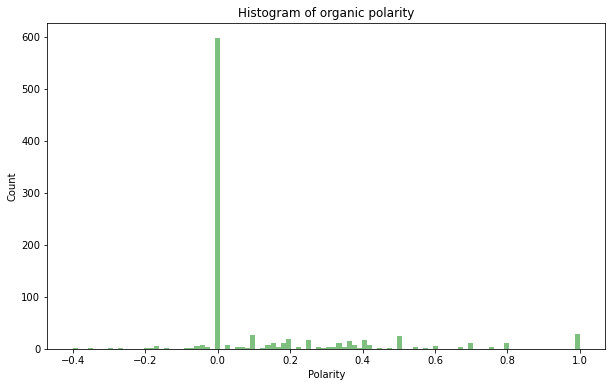

In [16]:

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(organic.polarity, 100, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of organic polarity')
plt.show();


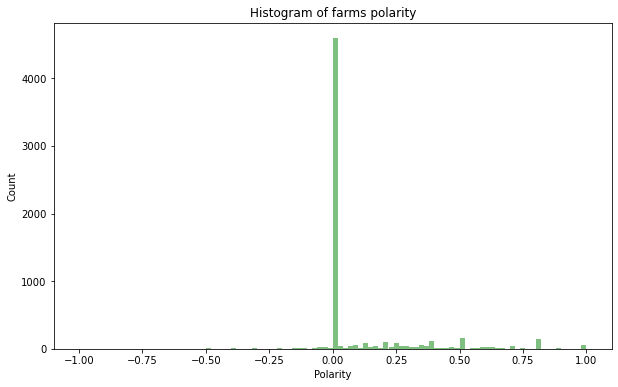

In [17]:

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(farms.polarity, 100, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of farms polarity')
plt.show();

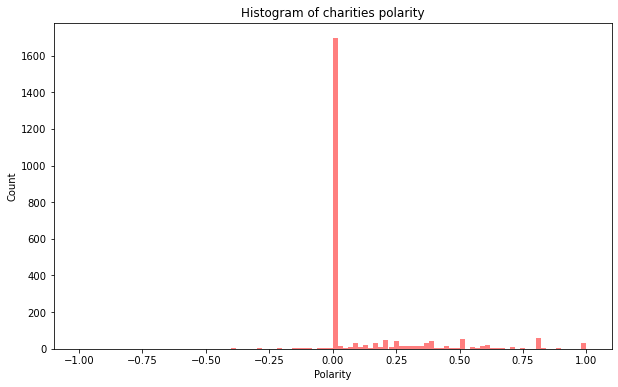

In [18]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(charities.polarity, 100, facecolor='red', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of charities polarity')
plt.show();


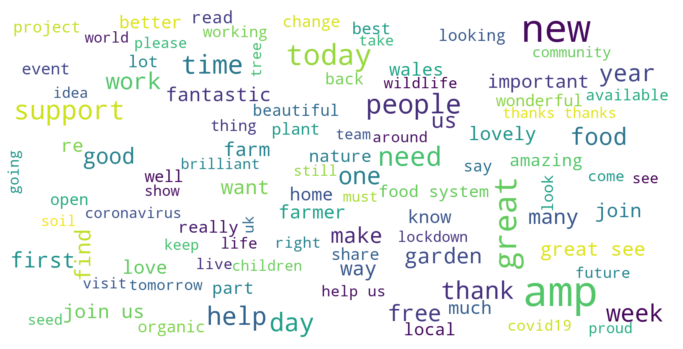

In [20]:
pos_tweets = df[df.polarity > 0]
pos_string = []
for t in pos_tweets.text_ed:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

#generate wordcloud visualisation for positive tweets (polarity greater than 0) mentioning 'organic'
wordcloud = WordCloud(width=1600, height=800,max_font_size=100, max_words=100, background_color='white').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

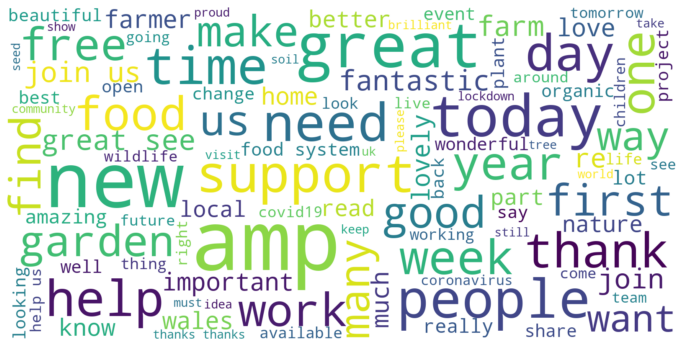

In [32]:
neutral_tweets = df[df.polarity == 0]
neutral_string = []
for t in neutral_tweets.text_ed:
    neutral_string.append(t)
neutral_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,max_words=100, background_color='white').generate(neutral_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

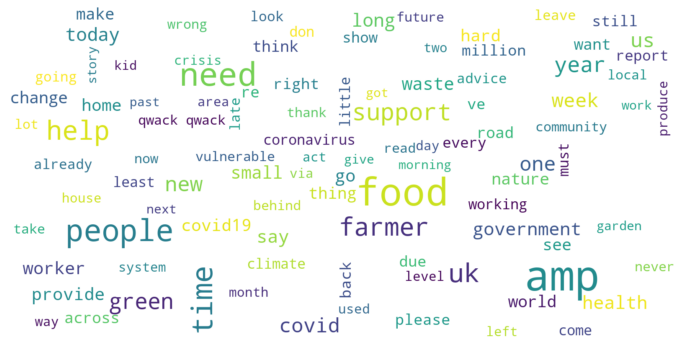

In [28]:
#if tweets is negative (polarity less than 0)  form new panda series. 

neg_tweets = df[df.polarity < 0]
neg_string = []
for t in neg_tweets.text_ed:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

#wordcloud visualisation for negative tweets (polarity less than 0) that mention 'organic'
wordcloud = WordCloud(width=1600, height=800,max_font_size=100, max_words=100, background_color='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

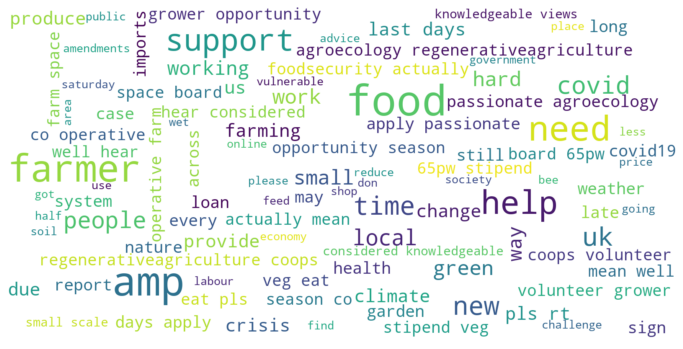

In [30]:
neg_tweets = farms[farms.polarity < 0]
neg_string = []
for t in neg_tweets.text_ed:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=100, max_words=100, background_color='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

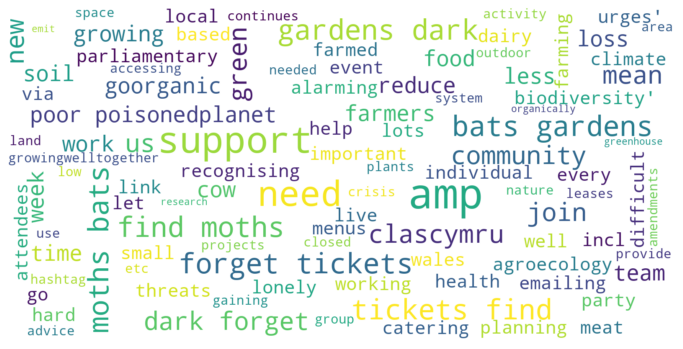

In [33]:
neg_tweets = charities[charities.polarity < 0]
neg_string = []
for t in neg_tweets.text_ed:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=100, max_words=100, background_color='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
#network analysis
edgelist = pd.DataFrame(df[['screen_name', 'mentions_screen_name','polarity']])
edgelist

,screen_name,mentions_screen_name,polarity
0,user_1,user_6,1.000000
1,user_1,user_7,1.000000
2,user_1,user_1,1.000000
3,user_1,user_3,0.500000
4,user_1,user_8,0.057937
...,...,...,...
26245,user_194,user_10412,0.136364
26246,user_194,user_10413,0.000000
26247,user_194,user_194,0.000000
26248,user_194,user_10413,0.000000


In [ ]:
#drawing the graph
G = nx.from_pandas_edgelist(edgelist, 'screen_name', 'mentions_screen_name', ['polarity'])
nx.spectral_layout(G, dim=2, weight=None, scale=1, center=None)
nx.draw(G)

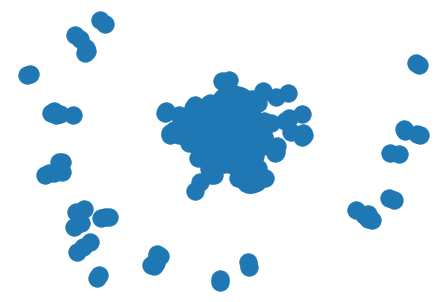

In [25]:
organic_network = pd.DataFrame(organic[['screen_name','mentions_screen_name','polarity']])
G = nx.from_pandas_edgelist(organic_network, 'screen_name', 'mentions_screen_name', ['polarity'])
nx.spectral_layout(G, dim=2, weight=None, scale=2, center=None)
nx.draw(G)

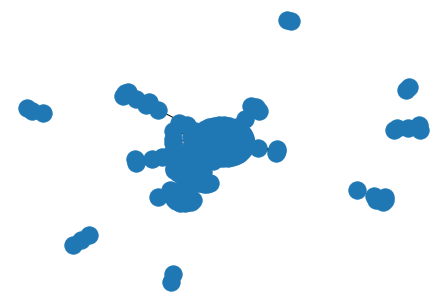

In [27]:
farm_network = pd.DataFrame(organicfarms[['screen_name','mentions_screen_name','polarity']])
G = nx.from_pandas_edgelist(farm_network, 'screen_name', 'mentions_screen_name', ['polarity'])
nx.spectral_layout(G, dim=2, weight=None, scale=1, center=None)
nx.draw(G)

In [ ]:
for index, text in df.iterrows():

        user = df.screen_name
        interaction = df.mentions_screen_name
        text = df.text

graph = nx.Graph()
        graph.add_edge(user, interaction, text=text)

#for index, tweet in tweets_final.iterrows():
    #user, interactions = get_interactions(tweet)
    #user_id, user_name = user
    #tweet_id = tweet["id"]
    #tweet_sent = tweet["sentiment"]
    #for interaction in interactions:
       # int_id, int_name = interaction
     #   graph.add_edge(user_id, int_id, tweet_id=tweet_id)
        

graph.node[user]["name"] = user_name
graph.node[interaction]["name"] = int_name


#G=nx.from_pandas_dataframe(df, 'screen_name', 'mentions_screen_name', edge_attr='weight')